#
# 1. LOAD  THE DATASET


In [19]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Default_Fin.csv')  # Adjust if filename differs
print(df.head())
print(df.info())

   Index  Employed  Bank Balance  Annual Salary  Defaulted?
0      1         1       8754.36      532339.56           0
1      2         0       9806.16      145273.56           0
2      3         1      12882.60      381205.68           0
3      4         1       6351.00      428453.88           0
4      5         1       9427.92      461562.00           0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          10000 non-null  int64  
 1   Employed       10000 non-null  int64  
 2   Bank Balance   10000 non-null  float64
 3   Annual Salary  10000 non-null  float64
 4   Defaulted?     10000 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 390.8 KB
None


In [21]:
df = df.drop(columns=['Index'])  # Not useful for prediction

X = df.drop('Defaulted?', axis=1)
y = df['Defaulted?']

#
# 2. Split the Data
 

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


#
# 3. Train a Random Forest Classifier

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


Accuracy: 0.9695
F1 Score: 0.38383838383838387
ROC-AUC: 0.9301063230150335


#
#  4: Save the Model

In [8]:
import joblib

joblib.dump(model, "credit_risk_model.pkl")


['credit_risk_model.pkl']

In [17]:
# Step 1: Import libraries
import joblib
import pandas as pd

# Step 2: Define constants
MODEL_PATH = '/Users/divayanshisharama/Desktop/Credit Risk Prediction System /models/credit_risk_model.pkl'

# Step 3: Load the trained model
try:
    model = joblib.load(MODEL_PATH)
except FileNotFoundError:
    print("❌ Model file not found. Check the path.")
    raise

# Step 4: Get validated user input
def get_numeric_input(prompt):
    while True:
        try:
            return float(input(prompt))
        except ValueError:
            print("⚠️ Please enter a valid number.")

def get_employment_status():
    status = input("Are you employed? (yes/no): ").strip().lower()
    return 1 if status in ['yes', 'y', 'employed'] else 0

# Step 5: Collect input data
employed = get_employment_status()
bank_balance = get_numeric_input("Enter Bank Balance ($): ")
annual_salary = get_numeric_input("Enter Annual Salary ($): ")

# Step 6: Prepare input DataFrame
sample_input = pd.DataFrame([{
    'Employed': employed,
    'Bank Balance': bank_balance,
    'Annual Salary': annual_salary
}])

# Step 7: Make prediction
prediction = model.predict(sample_input)[0]

# Step 8: Show result
result = "Loan Approved ✅" if prediction == 1 else "Loan Denied ❌"
print("\n🎯 Prediction Result:", result)



🎯 Prediction Result: Loan Approved ✅


In [26]:
print(df.columns)


Index(['Employed', 'Bank Balance', 'Annual Salary', 'Defaulted?'], dtype='object')


✅ Evaluation Metrics
Accuracy: 0.9695
F1 Score: 0.38383838383838387
ROC-AUC Score: 0.9301063230150335

📄 Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1933
           1       0.59      0.28      0.38        67

    accuracy                           0.97      2000
   macro avg       0.78      0.64      0.68      2000
weighted avg       0.96      0.97      0.96      2000



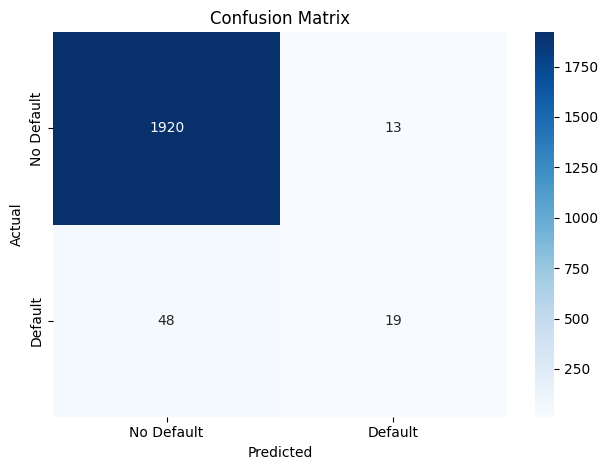

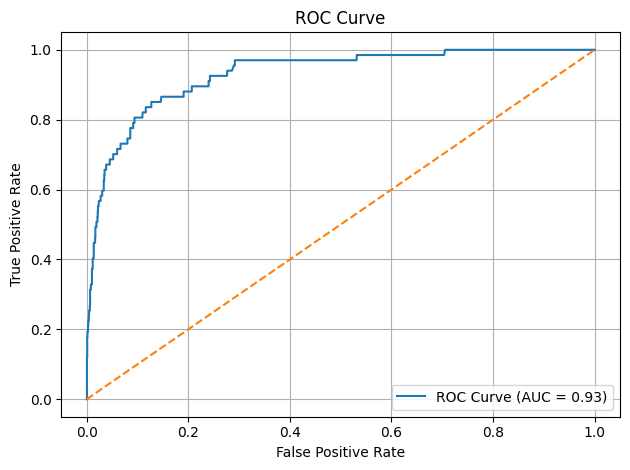

In [27]:
import pandas as pd
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score, classification_report,
    confusion_matrix, roc_curve, auc
)

# Load dataset
df = pd.read_csv("Default_Fin.csv")

# Features and target
X = df[['Employed', 'Bank Balance', 'Annual Salary']]
y = df['Defaulted?']

# Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Load or train model
# model = joblib.load("models/credit_risk_model.pkl")  # If loading
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluation metrics
print("✅ Evaluation Metrics")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["No Default", "Default"],
            yticklabels=["No Default", "Default"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [28]:
import pandas as pd
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, f1_score, recall_score, precision_score, roc_auc_score,
    classification_report, confusion_matrix, roc_curve, auc
)

from imblearn.over_sampling import SMOTE

# --- Load and prepare dataset ---


In [29]:
df = pd.read_csv("Default_Fin.csv")

X = df[['Employed', 'Bank Balance', 'Annual Salary']]
y = df['Defaulted?']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# --- Apply SMOTE to balance the training set ---

In [30]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts().to_dict())
print("After SMOTE:", pd.Series(y_train_res).value_counts().to_dict())


Before SMOTE: {0: 7734, 1: 266}
After SMOTE: {0: 7734, 1: 7734}


# --- Train model on resampled data ---

In [31]:
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train_res, y_train_res)


RandomForestClassifier(max_depth=10, random_state=42)

# --- Predict probabilities ---

In [32]:
y_proba = model.predict_proba(X_test)[:, 1]


# --- Tune threshold ---

In [33]:
threshold = 0.3  # lower than default to improve recall
y_pred = (y_proba > threshold).astype(int)


# --- Evaluate ---

In [34]:
print("\n📊 Evaluation Metrics (threshold = 0.3)")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



📊 Evaluation Metrics (threshold = 0.3)
Accuracy: 0.8345
Precision: 0.15263157894736842
Recall: 0.8656716417910447
F1 Score: 0.25950782997762867
ROC-AUC Score: 0.931021303209766

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.83      0.91      1933
           1       0.15      0.87      0.26        67

    accuracy                           0.83      2000
   macro avg       0.57      0.85      0.58      2000
weighted avg       0.97      0.83      0.89      2000



# --- Confusion Matrix ---

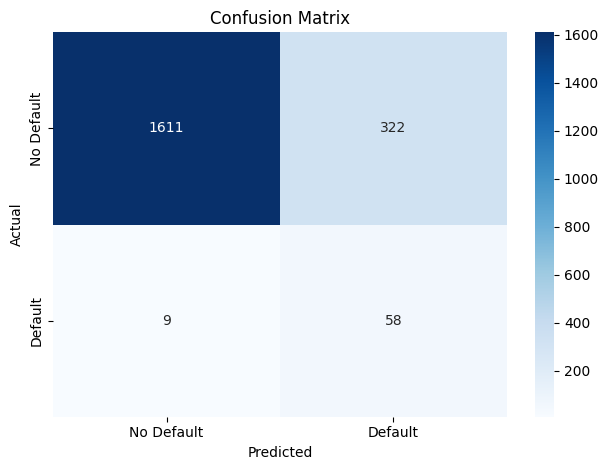

In [35]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["No Default", "Default"],
            yticklabels=["No Default", "Default"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

# --- ROC Curve ---/

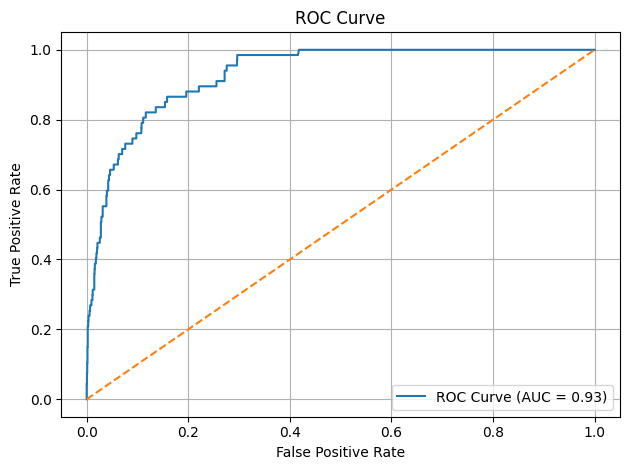

In [36]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



# --- Save the improved model ---

In [37]:
joblib.dump(model, "models/credit_risk_model_v2.pkl")
print("\n✅ Improved model saved as 'credit_risk_model_v2.pkl'")


✅ Improved model saved as 'credit_risk_model_v2.pkl'


In [38]:
y_pred = (model.predict_proba(X_test)[:, 1] > threshold).astype(int)


In [1]:
!!pip show sckit-learn

['\x1bWARNING: Package(s) not found: sckit-learn\x1b\x1b',
 '\x1b']